In [20]:
import pandas as pd

df = pd.read_csv("large_data.csv")



In [21]:
df_relevent = df[['Sales', 'Extra', 'Extra%', 'Bookings', 'Sales/Booking', 'Extra/Booking', 'Weekday', 'Date' , 'Benjamin_DRICKS', 'Benjamin_TIMMAR' ]]

In [22]:
df_relevent = df_relevent[df_relevent['Date'] > '2022-03-01']
df_relevent = df_relevent[df_relevent['Date'] != '2022-06-07']
df_relevent = df_relevent.rename(columns={'Benjamin_DRICKS': 'BenjaminExtra', 'Benjamin_TIMMAR': 'BenjaminHours'})
df_relevent['Benjamin_Extra/h'] = df_relevent['BenjaminExtra'] / df_relevent['BenjaminHours']
df_relevent['Date'] = pd.to_datetime(df_relevent['Date'])
df_relevent['Benjamin_Extra/h'] = pd.to_numeric(df_relevent['Benjamin_Extra/h'], errors='coerce')
df_relevent['BenjaminExtra'] = pd.to_numeric(df_relevent['BenjaminExtra'], errors='coerce')
df_relevent['BenjaminHours'] = pd.to_numeric(df_relevent['BenjaminHours'], errors='coerce')
df_relevent.to_csv('main.csv', index=False)

In [23]:
import pandas as pd
df = pd.read_csv("main.csv")

In [26]:
numeric_df = df.drop(columns=['Weekday', 'Date'])
weekday_means = numeric_df.groupby(df['Weekday']).mean()
weekday_means = weekday_means.drop(index='tor')
weekday_means

,Sales,Extra,Extra%,Bookings,Sales/Booking,Extra/Booking,BenjaminExtra,BenjaminHours,Benjamin_Extra/h
Weekday,,,,,,,,,
fre,66430.269141,4035.212344,0.060695,91.210938,730.663972,44.275503,487.177200,7.117150,68.317418
lör,82563.446457,4971.218583,0.060069,119.740157,691.862545,41.667473,576.842254,8.150000,70.952895
ons,50621.538846,3092.645615,0.061067,74.815385,681.319218,41.780267,428.345602,6.747475,63.472878
tis,48680.118110,3125.717087,0.064078,73.614173,661.421601,42.518206,456.591122,6.798507,66.914285


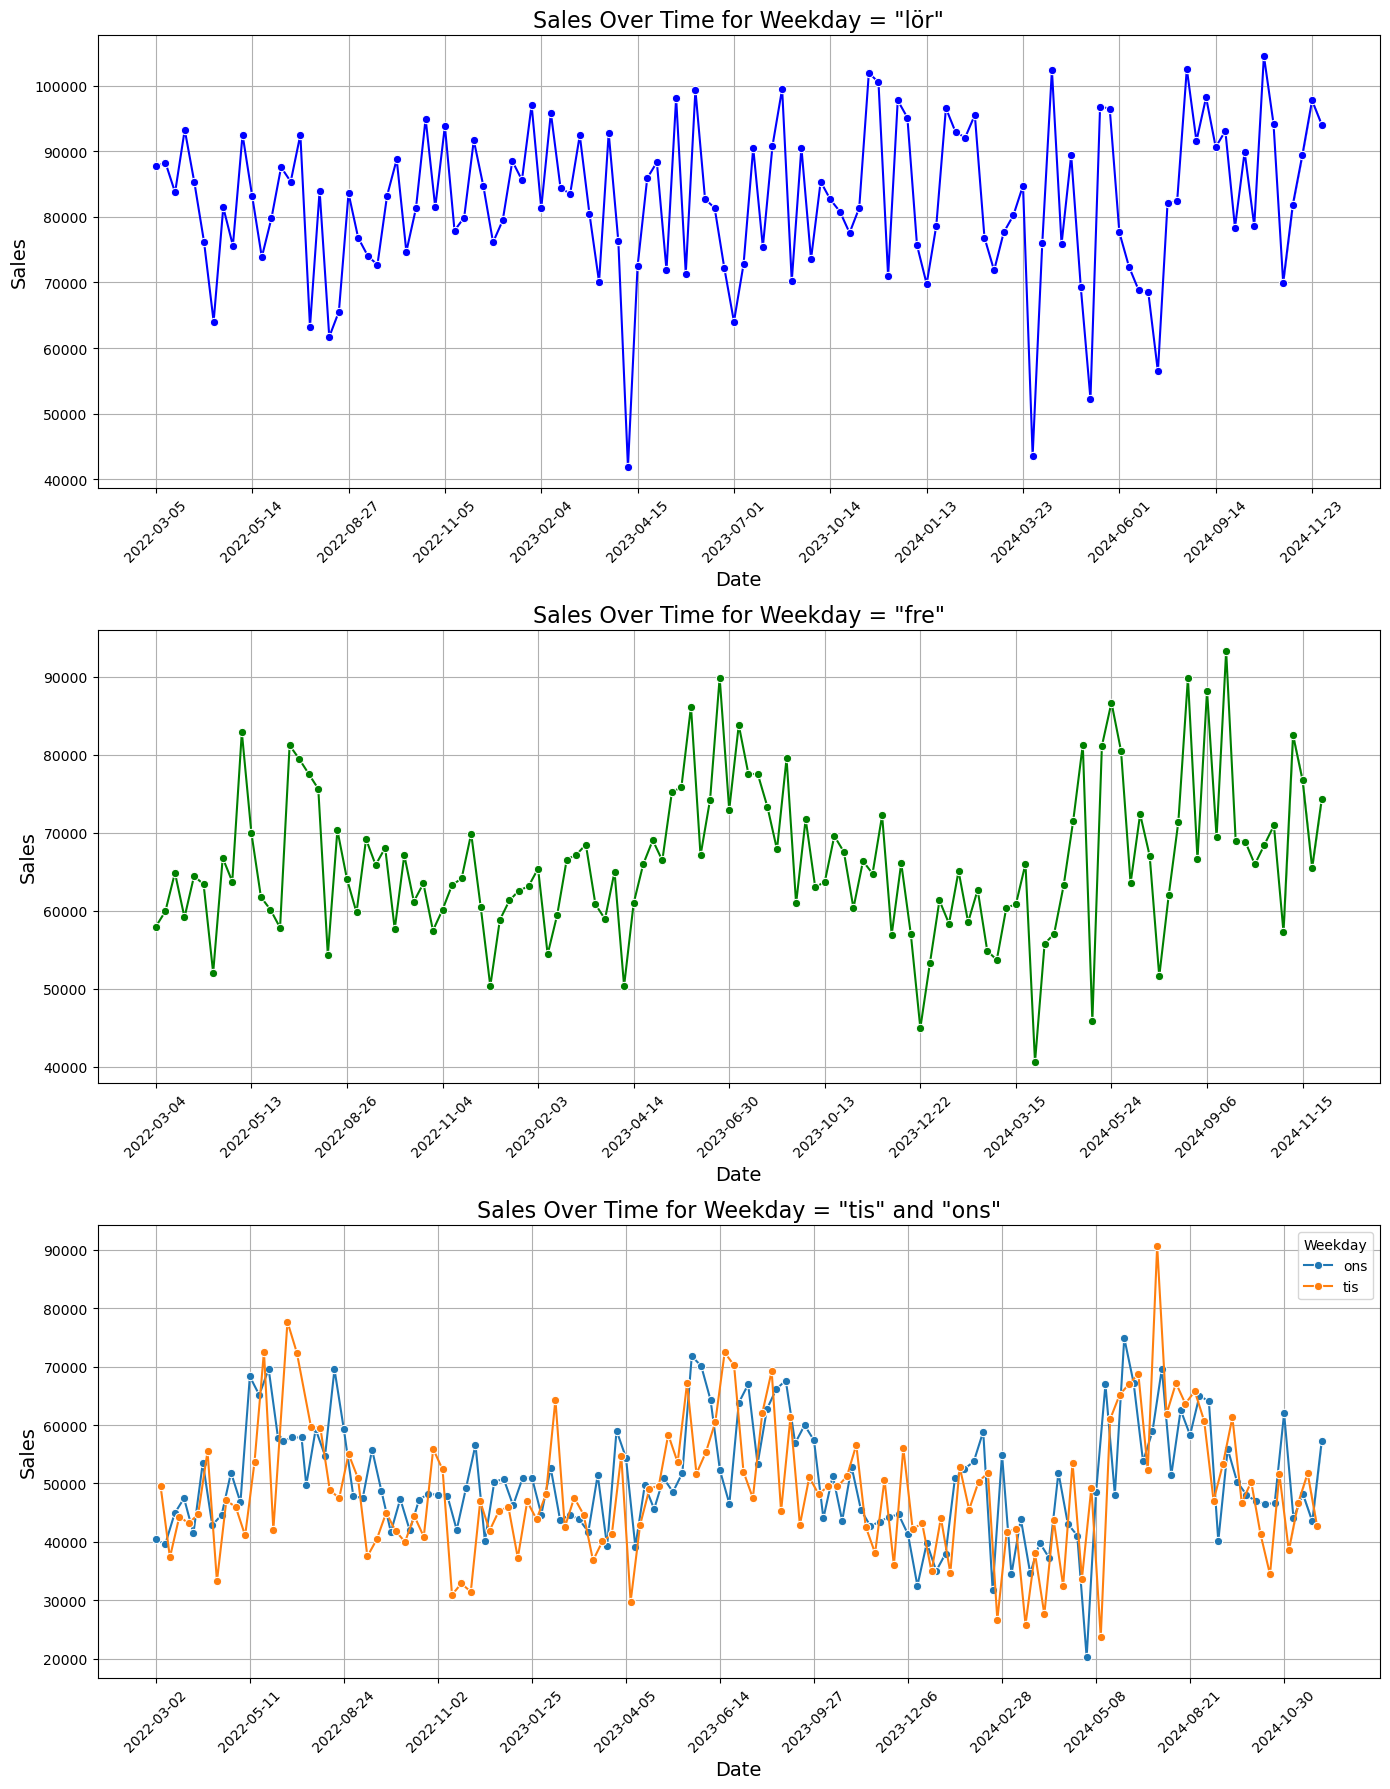

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for each condition
df_lor = df[df['Weekday'] == 'lör']
df_fre = df[df['Weekday'] == 'fre']
df_tis_ons = df[df['Weekday'].isin(['tis', 'ons'])]

# Set plot size
plt.figure(figsize=(14, 18))

# Plot for 'lör'
plt.subplot(3, 1, 1)
sns.lineplot(data=df_lor, x='Date', y='Sales', marker='o', color='blue')
plt.title('Sales Over Time for Weekday = "lör"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(0, len(df_lor['Date']), 10), rotation=45)  
plt.grid(True)

# Plot for 'fre'
plt.subplot(3, 1, 2)
sns.lineplot(data=df_fre, x='Date', y='Sales', marker='o', color='green')
plt.title('Sales Over Time for Weekday = "fre"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(0, len(df_fre['Date']), 10), rotation=45) 
plt.grid(True)

# Plot for 'tis' and 'ons' combined
plt.subplot(3, 1, 3)
sns.lineplot(data=df_tis_ons, x='Date', y='Sales', hue='Weekday', marker='o', palette='tab10')
plt.title('Sales Over Time for Weekday = "tis" and "ons"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(0, len(df_tis_ons['Date']), 20), rotation=45) 
plt.legend(title='Weekday')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


The diffrent plots show some days that are more intresting then others that we can look in to. For me the most intresting is:

Saturdays; The four lowest sales, and especially the diffrence between what looks to be the second lowest and second or third highest sales that are only two weeks apart.

Fridays; The fridays in may 2024 all look to be around 80k+ sales except for the second one that drops below 50k.

Tuesday/Wednesday; The top result really stands out. Some bottom notations are also quite far from the average but they are all similar dates and can be explained that winter time usually have lower sales due to no outdoor seating.

In [36]:
wheater = pd.read_csv("open_meteo.csv")

We start to identify the relevent dates, starting with saturdays:

In [37]:
lowest_sales_dates_lor = df_lor.nsmallest(4, 'Sales')['Date'].tolist()
wheater['time'] = pd.to_datetime(wheater['time'])
weather_for_lowest_sales = wheater[wheater['time'].isin(lowest_sales_dates_lor)]
weather_for_lowest_sales

C:\Users\benja\AppData\Local\Temp\ipykernel_20736\120644224.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weather_for_lowest_sales = wheater[wheater['time'].isin(lowest_sales_dates_lor)]


,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm)
403,2023-04-08,3,10.2,-2.2,4.1,0.0,0.0
760,2024-03-30,51,11.9,3.4,6.9,0.2,0.0
802,2024-05-11,3,15.7,3.1,9.2,0.0,0.0
858,2024-07-06,61,18.3,10.9,14.9,4.0,0.0


Then check may 2024 fridays.

In [39]:
df_fre['Date'] = pd.to_datetime(df_fre['Date'])
may2024_sales_dates_fre = df_fre[(df_fre['Date'].dt.year == 2024) & (df_fre['Date'].dt.month == 5)]
weather_for_friday_sales = wheater[wheater['time'].isin(may2024_sales_dates_fre['Date'])]
may2024_sales_dates_fre

C:\Users\benja\AppData\Local\Temp\ipykernel_20736\133274667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fre['Date'] = pd.to_datetime(df_fre['Date'])


,Sales,Extra,Extra%,Bookings,Sales/Booking,Extra/Booking,Weekday,Date,BenjaminExtra,BenjaminHours,Benjamin_Extra/h
491,81253.0,5685.80,0.069976,110.0,738.663636,51.689091,fre,2024-05-03,605.989950,7.883333,76.869761
496,45859.0,2670.40,0.058231,71.0,645.901408,37.611268,fre,2024-05-10,NaN,NaN,NaN
501,81109.5,4741.35,0.058456,115.0,705.300000,41.229130,fre,2024-05-17,583.104257,7.366667,79.154424
506,86670.0,4680.32,0.054002,124.0,698.951613,37.744516,fre,2024-05-24,474.591393,8.200000,57.876999
511,80481.0,5253.10,0.065271,118.0,682.042373,44.517797,fre,2024-05-31,620.648061,7.616667,81.485522


In [29]:
weather_for_friday_sales

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm)
794,2024-05-03,2,15.6,4.6,10.2,0.0,0.0
801,2024-05-10,3,13.0,4.7,8.8,0.0,0.0
808,2024-05-17,1,20.7,8.9,15.2,0.0,0.0
815,2024-05-24,63,22.6,12.4,16.7,7.9,0.0
822,2024-05-31,51,24.9,12.6,18.9,0.1,0.0


10e e kristihim och kallt
regn den 24e verkar inte påverka


samma för de högsta tis/ons


In [40]:
lowest_sales_date_tis_ons = df_tis_ons.nlargest(1, 'Sales')['Date'].tolist()
weather_for_lowest_sales = wheater[wheater['time'].isin(lowest_sales_date_tis_ons)]
weather_for_lowest_sales

C:\Users\benja\AppData\Local\Temp\ipykernel_20736\327088777.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  weather_for_lowest_sales = wheater[wheater['time'].isin(lowest_sales_date_tis_ons)]


,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm)
854,2024-07-02,51,20.3,12.9,17.0,0.1,0.0


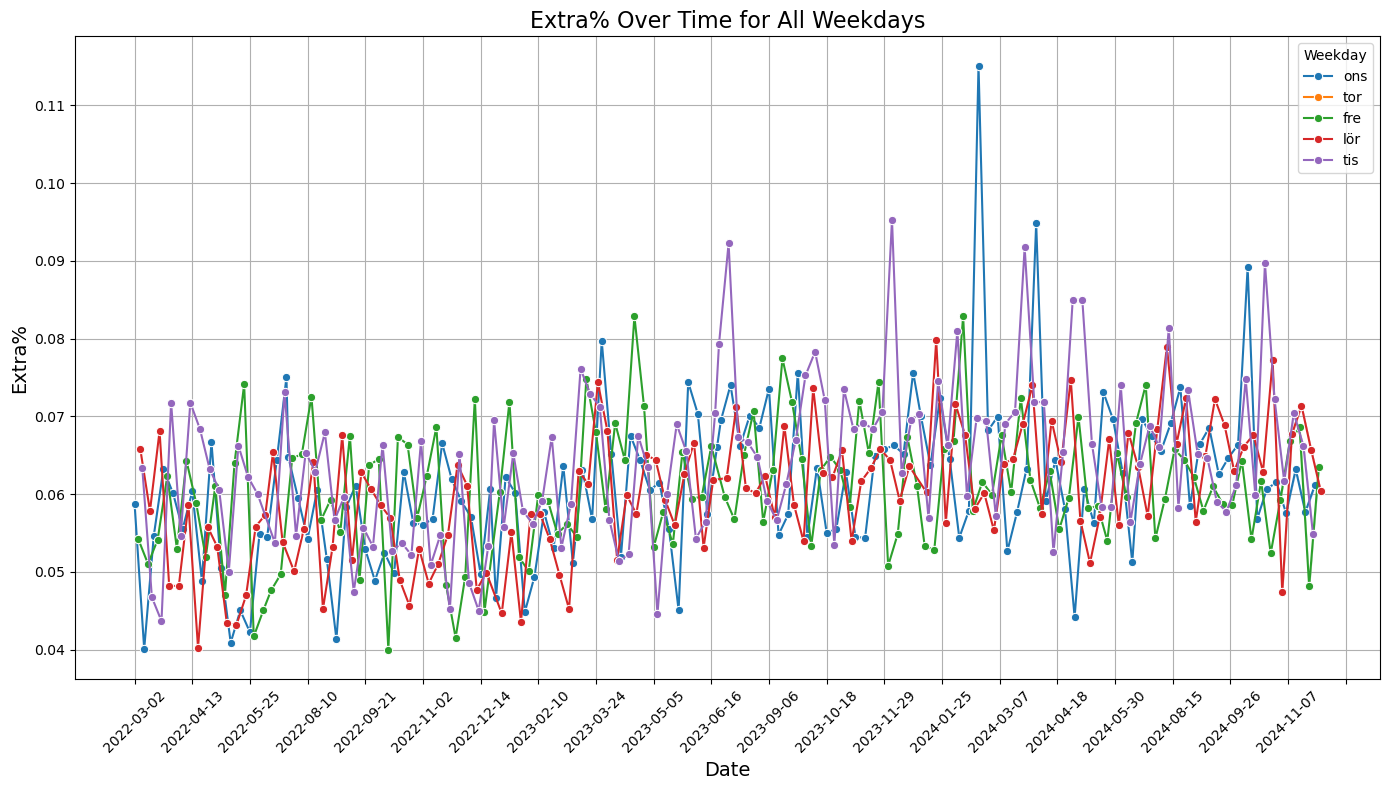

In [46]:
# Set plot size
plt.figure(figsize=(14, 8))

# Plot for all data in the same plot
sns.lineplot(data=df, x='Date', y='Extra%', hue='Weekday', marker='o', palette='tab10')

# Customize the plot
plt.title('Extra% Over Time for All Weekdays', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Extra%', fontsize=14)
plt.xticks(ticks=range(0, len(df['Date']), 30), rotation=45)  
plt.grid(True)
plt.legend(title='Weekday')

# Adjust layout
plt.tight_layout()
plt.show()


From this plot we can se that the only days with over 9% tips average (or even close to 9%) is tuesdays or wednesdays. So now we are gonna shift in to the most important thing; what days should I work to get the most amount of extra.

We will start by looking on what day of the week, whaat day of the month and what month of the year have the highest averge in some categories. These categories will be Extra, Extra/Booking, Extra% and then the indiviuall categories for from the columns BenjaminExtra and Benjamin_Extra/h.

In [47]:
# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week, day of the month, and month from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.day_name()  # Day of the week (e.g., Monday, Tuesday)
df['DayOfMonth'] = df['Date'].dt.day  # Day of the month (1, 2, ..., 31)
df['Month'] = df['Date'].dt.month_name()  # Month name (January, February, ..., December)

# Categories to analyze
categories = ['Extra', 'Extra/Booking', 'Extra%', 'BenjaminExtra', 'Benjamin_Extra/h']

# Find the highest average for each category based on Weekday, Day of Month, and Month
for category in categories:
    # Group by Day of Week and calculate the mean
    weekday_avg = df.groupby('DayOfWeek')[category].mean()
    highest_weekday = weekday_avg.idxmax()  # Day with the highest average
    highest_weekday_avg = weekday_avg.max()  # Highest average value for this category

    # Group by Day of Month and calculate the mean
    dayofmonth_avg = df.groupby('DayOfMonth')[category].mean()
    highest_dayofmonth = dayofmonth_avg.idxmax()  # Day of the month with the highest average
    highest_dayofmonth_avg = dayofmonth_avg.max()  # Highest average value for this category

    # Group by Month and calculate the mean
    month_avg = df.groupby('Month')[category].mean()
    highest_month = month_avg.idxmax()  # Month with the highest average
    highest_month_avg = month_avg.max()  # Highest average value for this category

    # Print the results
    print(f"Category: {category}")
    print(f"  - Highest average by Day of Week: {highest_weekday} with {highest_weekday_avg:.2f}")
    print(f"  - Highest average by Day of Month: {highest_dayofmonth} with {highest_dayofmonth_avg:.2f}")
    print(f"  - Highest average by Month: {highest_month} with {highest_month_avg:.2f}")
    print('-' * 50)


Category: Extra
  - Highest average by Day of Week: Saturday with 4971.22
  - Highest average by Day of Month: 23 with 4157.80
  - Highest average by Month: August with 4189.30
--------------------------------------------------
Category: Extra/Booking
  - Highest average by Day of Week: Friday with 44.28
  - Highest average by Day of Month: 21 with 49.82
  - Highest average by Month: July with 48.48
--------------------------------------------------
Category: Extra%
  - Highest average by Day of Week: Tuesday with 0.06
  - Highest average by Day of Month: 21 with 0.07
  - Highest average by Month: August with 0.06
--------------------------------------------------
Category: BenjaminExtra
  - Highest average by Day of Week: Saturday with 576.84
  - Highest average by Day of Month: 23 with 550.29
  - Highest average by Month: December with 594.40
--------------------------------------------------
Category: Benjamin_Extra/h
  - Highest average by Day of Week: Saturday with 70.95
  - Highe

In [48]:
# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week, day of the month, and month from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.day_name()  # Day of the week (e.g., Monday, Tuesday)
df['DayOfMonth'] = df['Date'].dt.day  # Day of the month (1, 2, ..., 31)
df['Month'] = df['Date'].dt.month_name()  # Month name (January, February, ..., December)

# Categories to analyze
categories = ['Extra', 'Extra/Booking', 'Extra%', 'BenjaminExtra', 'Benjamin_Extra/h']

# Print the results for each category
for category in categories:
    print(f"Category: {category}")
    
    # Group by Day of Week and calculate the mean
    weekday_avg = df.groupby('DayOfWeek')[category].mean().sort_values(ascending=False)
    print("  - Average by Day of Week:")
    print(weekday_avg)
    
    # Group by Day of Month and calculate the mean
    dayofmonth_avg = df.groupby('DayOfMonth')[category].mean().sort_values(ascending=False)
    print("  - Average by Day of Month:")
    print(dayofmonth_avg)
    
    # Group by Month and calculate the mean
    month_avg = df.groupby('Month')[category].mean().sort_values(ascending=False)
    print("  - Average by Month:")
    print(month_avg)
    
    print('-' * 50)


Category: Extra
  - Average by Day of Week:
DayOfWeek
Saturday     4971.218583
Friday       4035.212344
Thursday     3245.884766
Tuesday      3125.717087
Wednesday    3092.645615
Name: Extra, dtype: float64
  - Average by Day of Month:
DayOfMonth
23    4157.803500
3     4012.360000
29    4006.551000
27    3884.121905
9     3852.721250
21    3851.948182
26    3824.701000
25    3805.323158
17    3794.342727
30    3771.213500
24    3749.940526
4     3740.818333
16    3739.208333
18    3734.871579
8     3677.324783
28    3660.200476
5     3659.962632
19    3646.393500
31    3626.817500
10    3624.689545
13    3621.282273
15    3619.142609
20    3591.646190
7     3579.956190
14    3550.241739
11    3548.959500
2     3537.612727
6     3516.646190
12    3507.009048
1     3300.838095
22    3290.135714
Name: Extra, dtype: float64
  - Average by Month:
Month
August       4189.302333
June         4166.347400
July         4123.170000
September    3955.020000
May          3690.890758
November     3

In [50]:
import pandas as pd

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week, day of the month, and month from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.day_name()  # Day of the week (e.g., Monday, Tuesday)
df['DayOfMonth'] = df['Date'].dt.day  # Day of the month (1, 2, ..., 31)
df['Month'] = df['Date'].dt.month_name()  # Month name (January, February, ..., December)

# Categories to analyze
categories = ['Extra', 'Extra/Booking', 'Extra%', 'BenjaminExtra', 'Benjamin_Extra/h']

# Group by Day of Week, Day of Month, and Month, then calculate the mean for each category
# Create DataFrames for each grouping
df_dayofweek = df.groupby('DayOfWeek')[categories].mean()
df_dayofmonth = df.groupby('DayOfMonth')[categories].mean()
df_month = df.groupby('Month')[categories].mean()

In [51]:
# Display the DataFrames
print("Average by Day of the Week:")
df_dayofweek

Average by Day of the Week:


,Extra,Extra/Booking,Extra%,BenjaminExtra,Benjamin_Extra/h
DayOfWeek,,,,,
Friday,4035.212344,44.275503,0.060695,487.177200,68.317418
Saturday,4971.218583,41.667473,0.060069,576.842254,70.952895
Thursday,3245.884766,42.512852,NaN,464.059354,67.940767
Tuesday,3125.717087,42.518206,0.064078,456.591122,66.914285
Wednesday,3092.645615,41.780267,0.061067,428.345602,63.472878


In [52]:
print("\nAverage by Day of the Month:")
df_dayofmonth


Average by Day of the Month:


,Extra,Extra/Booking,Extra%,BenjaminExtra,Benjamin_Extra/h
DayOfMonth,,,,,
1,3300.838095,40.010619,0.057749,515.206327,72.807447
2,3537.612727,39.672017,0.058577,429.696916,62.631460
3,4012.360000,43.622022,0.064377,547.921799,70.235439
4,3740.818333,42.637782,0.058559,473.731729,66.366384
5,3659.962632,42.035314,0.061325,429.530767,66.029498
6,3516.646190,41.631839,0.060779,419.817404,62.726088
7,3579.956190,41.989805,0.061641,464.321249,70.166526
8,3677.324783,43.622564,0.061758,463.781112,68.806908
9,3852.721250,44.170634,0.064632,433.845291,65.382666


In [53]:
print("\nAverage by Month of the Year:")
df_month


Average by Month of the Year:


,Extra,Extra/Booking,Extra%,BenjaminExtra,Benjamin_Extra/h
Month,,,,,
April,3495.942969,41.869858,0.062043,559.454152,77.483342
August,4189.302333,43.172015,0.064029,458.091625,63.676710
December,3254.805000,40.886950,0.059820,594.401729,79.258272
February,3543.852927,44.085863,0.062054,521.915637,70.795738
January,3349.536667,42.567210,0.061182,480.964649,64.009341
July,4123.170000,48.482534,0.062555,392.160960,56.497057
June,4166.347400,45.421896,0.061765,426.828153,61.224209
March,3310.477313,40.875520,0.062147,478.433328,70.368031
May,3690.890758,40.541861,0.058027,469.875271,64.816947


So what can be said from all of this? If my goal is to get as much extra as possible, then we should look at the Extra column combined with the BenjaminExtra column. 

Saturday is the clear winner in both categories.

For what day of the month we could look at it diffrent ways. We could divede the month into 3 parts and see if early, in the middle or late in the month is most proffitable. But from reading this data we can se that the 23rd actually has the highest notaction in both categories. 

When we start looking at months it gets more intressting. We can se that the summer months have the highest total extra but for me individually it is not like that. This can be explain with that in the summer the resturant open up outdoor seating with results in more guests (=more extra) but also more personal working (more to share with). In this case I am actuelly not intressted in how much extra my collegues get, I am looking to figure out what day is most profitable for me. In that case we can se that december actually stands out and the summer month are amoung the lowest results.

In conclusion: If I could only work one day for the next seven years, and I would like to earn as much extra as possible, then I should work on December 23rd the year when it occurs on a saturday. Ofcourse this falls apart becasue a) We saw earlier that holidays like easter resulted in the worst sales and b) the resturant is always closed for christmas. 

Let us then instead look on the other categories; Extra/booking, Extra% and Benjamin_Extra/h. If I would like to find out what days i should work to get the most extra with the least effort, these are the categories to look at. Here i think Benjamin Extra/h is the most important, beacasue working long days is the most exhausting. But we should also look at Extra/booking and Extra% becasue less guests (or less sales witch is what Extra% means. Although that could only depend on more expensive items sold, for example a bottle of wine insead of a soda, that is about the same amount of work. So this categoriy are the least important) also mean less work.

Saturdays have the most Extra/h but seeing that fridays are second in that category, and outclassing saturdays in Extra/Booking, I would actually argue that fridays are the most profitable day of the week. 

I think that looking into day of the month acctually is more intresting to do the way I wrote about earlier, dividing the month in three categories. So I will do that to analyze the result.

In [55]:
# Create a new column 'MonthPeriod' to categorize the days into Start, Middle, and End of the month
def categorize_period(day):
    if 1 <= day <= 10:
        return 'Start of the Month'
    elif 11 <= day <= 20:
        return 'Middle of the Month'
    else:
        return 'End of the Month'

# Apply the categorize_period function to the 'DayOfMonth' column
df['MonthPeriod'] = df['DayOfMonth'].apply(categorize_period)

# Group by the new 'MonthPeriod' column and calculate the mean for each category
df_month_period = df.groupby('MonthPeriod')[categories].mean()

# Display the new DataFrame with the categorized periods
print("Average by Month Period:")
df_month_period

Average by Month Period:


,Extra,Extra/Booking,Extra%,BenjaminExtra,Benjamin_Extra/h
MonthPeriod,,,,,
End of the Month,3788.575256,43.571071,0.062878,506.591622,69.656110
Middle of the Month,3635.916140,41.894616,0.060457,468.411099,65.333644
Start of the Month,3647.950190,42.175251,0.061104,465.523151,67.336778


We can see that end of the month is the winner in all categories, followed by start of the month. Conclusion from this is that I should try to work early in the month, or possbly really late. If I would go on a work-two-weeks-at-a-time-schedule then I should try to work for example 27th-10th and then not work 11th-26th.

Looking at the months we can see that december wins again if we count extra per hour for me, but it is really hard to make patterns if we include the other two categories. Like i wrote earlier the extra per hour categoriy is the most important one, so choosing one month it would be december. But we can actually do what we did with the months, dividing the year into seasons.

In [59]:
# Create a mapping of months to seasons
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Fall', 'October': 'Fall',
    'November': 'Fall', 'December': 'Winter'
}

# Apply the mapping to the 'Month' column to create a new 'Season' column
df['Season'] = df['Month'].map(season_mapping)

# Group by the 'Season' column and calculate the mean for each category
df_season = df.groupby('Season')[categories].mean()

# Display the new DataFrame with the categorized seasons
print("Average by Season:")
df_season


Average by Season:


,Extra,Extra/Booking,Extra%,BenjaminExtra,Benjamin_Extra/h
Season,,,,,
Fall,3743.319908,42.723364,0.061502,483.992797,68.986299
Spring,3498.178274,41.086770,0.060731,491.023713,69.047603
Summer,4174.226750,44.552009,0.062963,439.266858,62.015064
Winter,3396.098491,42.647365,0.061109,517.575401,69.366502


From this the biggest conclusion to draw is actually that I, Benjamin, should not work during the summer. The categories that are not based on my personal extra actually have the highest results during the summer, but personally the summer have the lowest results. The diffrence is actually significant, the other seasons are pretty close but summer have about 7kr/h less. 

To sumarize the result, from now on i will only try to work fridays in the end of the month, skipping the whole summertime. That is the best way to earn as much extra, doing as little work as possible.